# Step 1: Exploratory Data Analyst and Data Preparation for later Step

# Readme
*This notebook is mainly focusing on the EDA, data understanding, and data preparation for the later step, no actual methodologies implementation in this notebook*

# 1.DataSet Processing
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

In [1]:
import pandas as pd

In [2]:
def read_json_to_dataframe(file_path):
    return pd.read_json(file_path)

You might need to adjust the data path to the json file

In [3]:
dev = read_json_to_dataframe('project-data/dev-claims.json').transpose()
train = read_json_to_dataframe('project-data/train-claims.json').transpose()
test = read_json_to_dataframe("project-data/test-claims-unlabelled.json").transpose()
evidence = pd.read_json("project-data/evidence.json", lines = True).transpose()

In [4]:
train

,claim_text,claim_label,evidences
claim-1937,Not only is there no scientific evidence that ...,DISPUTED,"[evidence-442946, evidence-1194317, evidence-1..."
claim-126,El Niño drove record highs in global temperatu...,REFUTES,"[evidence-338219, evidence-1127398]"
claim-2510,"In 1946, PDO switched to a cool phase.",SUPPORTS,"[evidence-530063, evidence-984887]"
claim-2021,Weather Channel co-founder John Coleman provid...,DISPUTED,"[evidence-1177431, evidence-782448, evidence-5..."
claim-2449,"""January 2008 capped a 12 month period of glob...",NOT_ENOUGH_INFO,"[evidence-1010750, evidence-91661, evidence-72..."
...,...,...,...
claim-1504,Climate scientists say that aspects of the cas...,SUPPORTS,"[evidence-1055682, evidence-1047356, evidence-..."
claim-243,"In its 5th assessment report in 2013, the IPCC...",SUPPORTS,[evidence-916755]
claim-2302,"Since the mid 1970s, global temperatures have ...",NOT_ENOUGH_INFO,"[evidence-403673, evidence-889933, evidence-11..."
claim-502,But abnormal temperature spikes in February an...,NOT_ENOUGH_INFO,"[evidence-97375, evidence-562427, evidence-521..."


In [5]:
test

,claim_text
claim-2967,The contribution of waste heat to the global c...
claim-979,“Warm weather worsened the most recent five-ye...
claim-1609,Greenland has only lost a tiny fraction of its...
claim-1020,“The global reef crisis does not necessarily m...
claim-2599,Small amounts of very active substances can ca...
...,...
claim-293,When the measuring equipment gets old and need...
claim-910,"The cement, iron and steel, and petroleum refi..."
claim-2815,A new peer-reviewed study on Surface Warming a...
claim-1652,The strong CO2 effect has been observed by man...


In [6]:
dev

,claim_text,claim_label,evidences
claim-752,[South Australia] has the most expensive elect...,SUPPORTS,"[evidence-67732, evidence-572512]"
claim-375,when 3 per cent of total annual global emissio...,NOT_ENOUGH_INFO,"[evidence-996421, evidence-1080858, evidence-2..."
claim-1266,This means that the world is now 1C warmer tha...,SUPPORTS,"[evidence-889933, evidence-694262]"
claim-871,"“As it happens, Zika may also be a good model ...",NOT_ENOUGH_INFO,"[evidence-422399, evidence-702226, evidence-28..."
claim-2164,Greenland has only lost a tiny fraction of its...,REFUTES,"[evidence-52981, evidence-264761, evidence-947..."
...,...,...,...
claim-2400,"'To suddenly label CO2 as a ""pollutant"" is a d...",REFUTES,"[evidence-409365, evidence-127519, evidence-85..."
claim-204,"after a natural orbitally driven warming, atmo...",NOT_ENOUGH_INFO,"[evidence-368192, evidence-261690, evidence-20..."
claim-1426,Many of the world’s coral reefs are already ba...,NOT_ENOUGH_INFO,"[evidence-1124018, evidence-995813, evidence-1..."
claim-698,A recent study led by Lawrence Livermore Natio...,REFUTES,[evidence-660755]


In [7]:
evidence = evidence.rename(columns={0: 'evidence_text'})

In [8]:
evidence

,evidence_text
evidence-0,"John Bennet Lawes, English entrepreneur and ag..."
evidence-1,Lindberg began his professional career at the ...
evidence-2,``Boston (Ladies of Cambridge)'' by Vampire We...
evidence-3,"Gerald Francis Goyer (born October 20, 1936) w..."
evidence-4,He detected abnormalities of oxytocinergic fun...
...,...
evidence-1208822,Also on the property is a contributing garage ...
evidence-1208823,| class = ``fn org'' | Fyrde | | | | 6110 | | ...
evidence-1208824,"Dragon Storm (game), a role-playing game and c..."
evidence-1208825,It states that the Zeriuani ``which is so grea...


# Print some basic information

Check null data, and memory usage

In [9]:
print("Train dataset info: ", train.info())
print("\n Train dataset null data: ", train.isnull().sum())
print("\n Dev dataset info: ", dev.info())
print("\n Dev dataset null data: ", dev.isnull().sum())
print("\n Test dataset info: ", test.info())
print("\n Test dataset null data: ", test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1228 entries, claim-1937 to claim-3093
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   claim_text   1228 non-null   object
 1   claim_label  1228 non-null   object
 2   evidences    1228 non-null   object
dtypes: object(3)
memory usage: 70.7+ KB
Train dataset info:  None

 Train dataset null data:  claim_text     0
claim_label    0
evidences      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, claim-752 to claim-1021
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   claim_text   154 non-null    object
 1   claim_label  154 non-null    object
 2   evidences    154 non-null    object
dtypes: object(3)
memory usage: 8.9+ KB

 Dev dataset info:  None

 Dev dataset null data:  claim_text     0
claim_label    0
evidences      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 

In [10]:
print("\n evidence corpus info: ", evidence.info())
print("\n evidence corpus null data: ", evidence.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 1208827 entries, evidence-0 to evidence-1208826
Data columns (total 1 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   evidence_text  1208827 non-null  object
dtypes: object(1)
memory usage: 50.7+ MB

 evidence corpus info:  None

 evidence corpus null data:  evidence_text    0
dtype: int64


No null data

# Plot Label Distribution

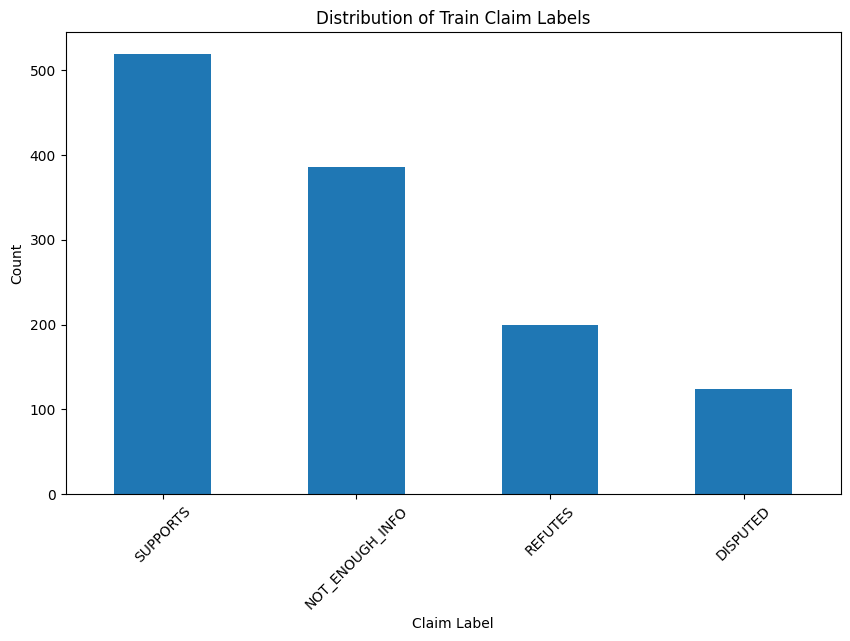

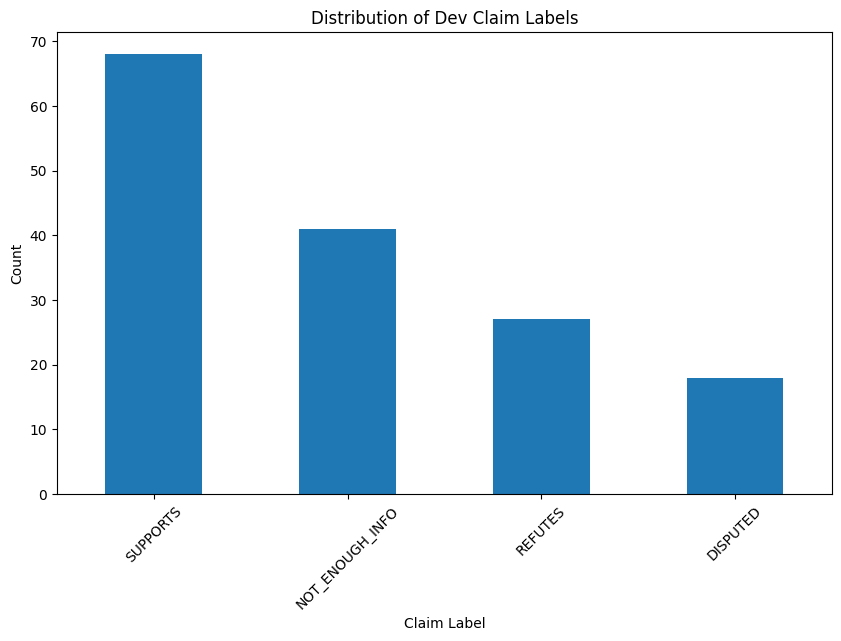

In [11]:
import matplotlib.pyplot as plt

# Count the occurrences of each label
label_counts = train['claim_label'].value_counts()

# Plot the distribution of claim labels
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Train Claim Labels')
plt.xlabel('Claim Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Count the occurrences of each label
label_counts = dev['claim_label'].value_counts()

# Plot the distribution of claim labels
plt.figure(figsize=(10, 6))
label_counts.plot(kind='bar')
plt.title('Distribution of Dev Claim Labels')
plt.xlabel('Claim Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Train and dev have equal label distribution

# Text length distribution

Average Train Claim Text Length: 122.96


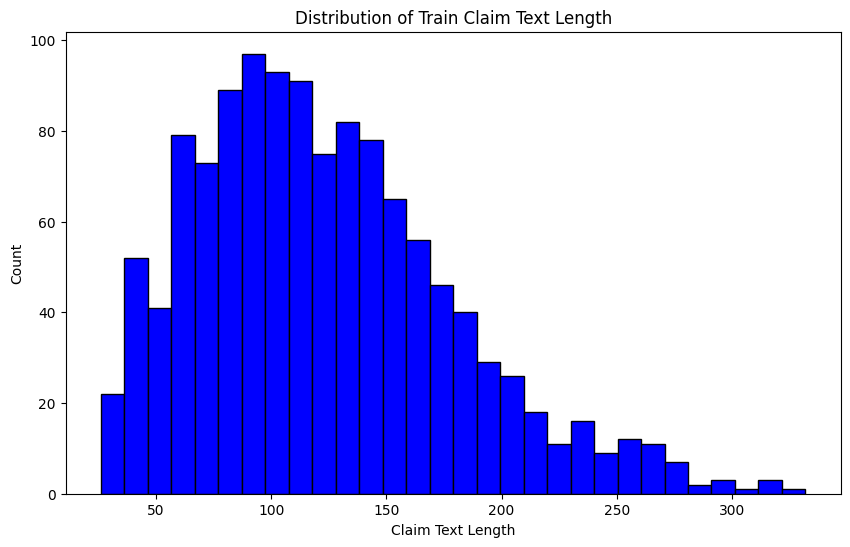

Average Dev Claim Text Length: 127.99


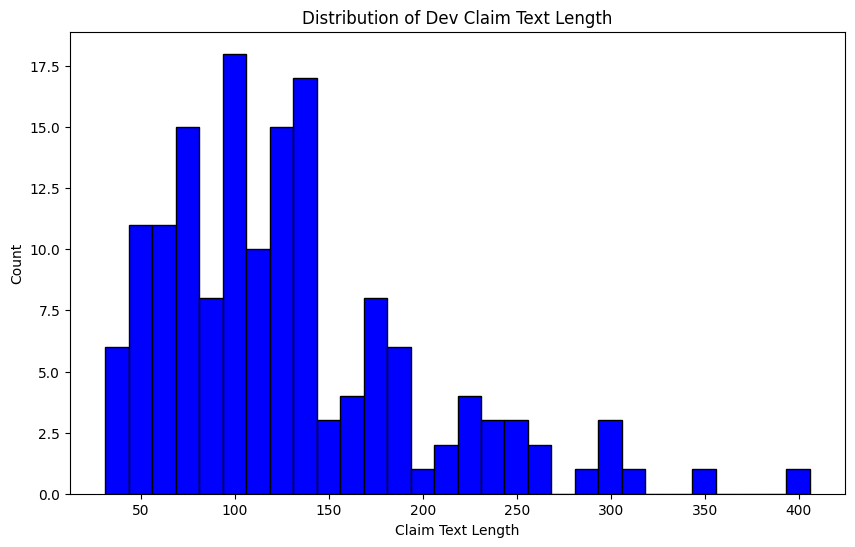

Average Test Claim Text Length: 122.37


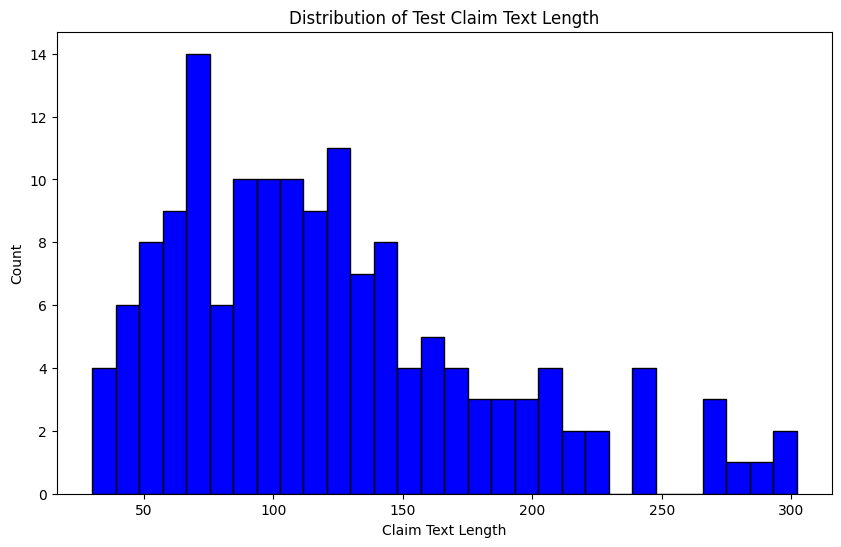

Average Evidence Text Length: 119.51


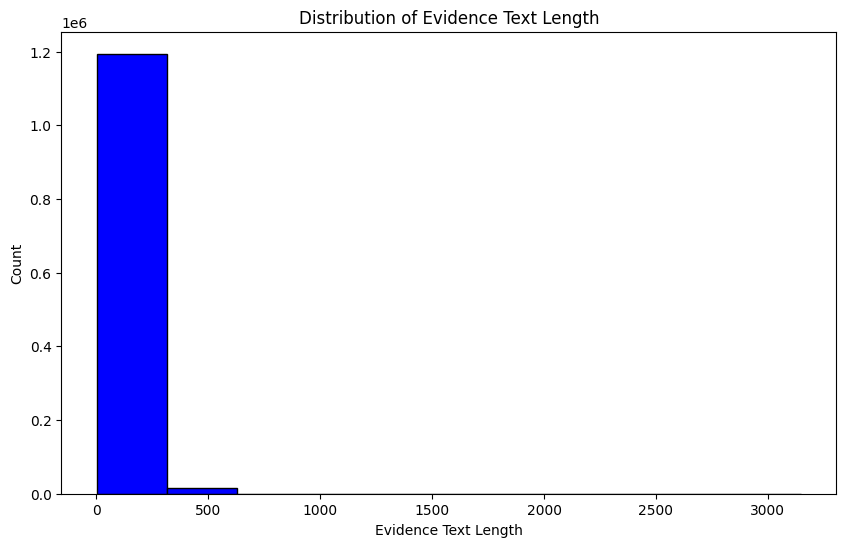

In [18]:
import matplotlib.pyplot as plt

# Calculate the length of each claim
train['claim_length'] = train['claim_text'].apply(len)

# Calculate and print the average claim length for the train dataset
average_train_length = train['claim_length'].mean()
print(f'Average Train Claim Text Length: {average_train_length:.2f}')

# Plot the distribution of Train claim lengths using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(train['claim_length'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Train Claim Text Length')
plt.xlabel('Claim Text Length')
plt.ylabel('Count')
plt.show()

dev['claim_length'] = dev['claim_text'].apply(len)

# Calculate and print the average claim length for the dev dataset
average_dev_length = dev['claim_length'].mean()
print(f'Average Dev Claim Text Length: {average_dev_length:.2f}')

# Plot the distribution of Dev claim lengths using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(dev['claim_length'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Dev Claim Text Length')
plt.xlabel('Claim Text Length')
plt.ylabel('Count')
plt.show()

test['claim_length'] = test['claim_text'].apply(len)

# Calculate and print the average claim length for the test dataset
average_test_length = test['claim_length'].mean()
print(f'Average Test Claim Text Length: {average_test_length:.2f}')

# Plot the distribution of Test claim lengths using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(test['claim_length'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Test Claim Text Length')
plt.xlabel('Claim Text Length')
plt.ylabel('Count')
plt.show()

evidence['evidence_text'] = evidence['evidence_text'].astype(str)
evidence['evidence_length'] = evidence['evidence_text'].apply(len)

# Calculate and print the average evidence length
average_evidence_length = evidence['evidence_length'].mean()
print(f'Average Evidence Text Length: {average_evidence_length:.2f}')

# Plot the distribution of Evidence Text Length using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(evidence['evidence_length'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Evidence Text Length')
plt.xlabel('Evidence Text Length')
plt.ylabel('Count')
plt.show()

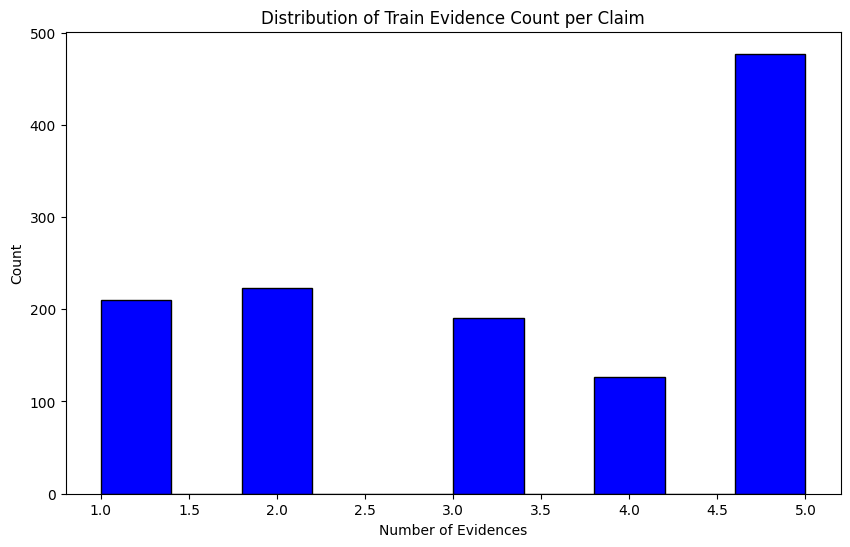

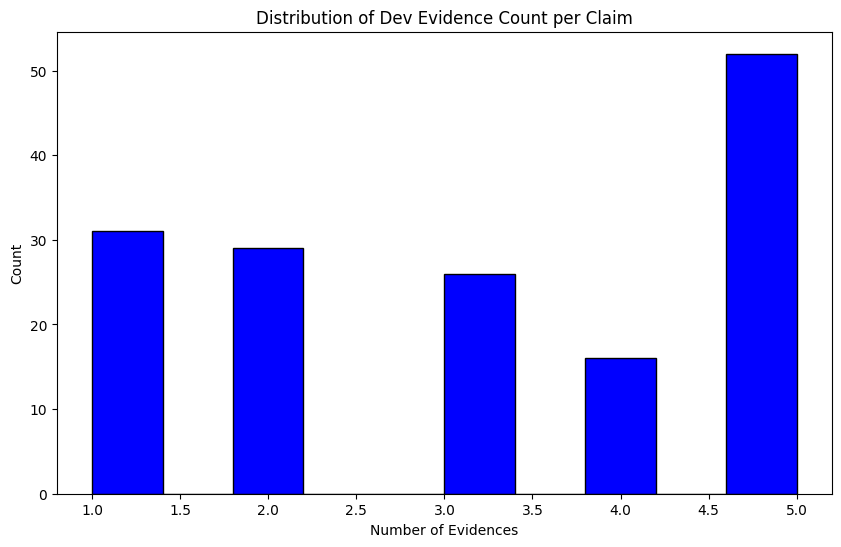

In [13]:
train['evidence_count'] = train['evidences'].apply(len)

# Plot the distribution of evidence counts
plt.figure(figsize=(10, 6))
plt.hist(train['evidence_count'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Train Evidence Count per Claim')
plt.xlabel('Number of Evidences')
plt.ylabel('Count')
plt.show()

dev['evidence_count'] = dev['evidences'].apply(len)

# Plot the distribution of evidence counts
plt.figure(figsize=(10, 6))
plt.hist(dev['evidence_count'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Dev Evidence Count per Claim')
plt.xlabel('Number of Evidences')
plt.ylabel('Count')
plt.show()

The number of evidence are not fixed

# Text Length what if we remove stop word

In [16]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def remove_stopwords(input_text):
    # Tokenize the text into words
    tokens = input_text.split()
    # Remove stopwords
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Join words back into one string
    return ' '.join(filtered_tokens)

train['claim_text_processed'] = train['claim_text'].apply(remove_stopwords)
dev['claim_text_processed'] = dev['claim_text'].apply(remove_stopwords)
test['claim_text_processed'] = test['claim_text'].apply(remove_stopwords)
evidence['evidence_text_processed'] = evidence['evidence_text'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\15950\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Average Train Claim Text Length: 94.99


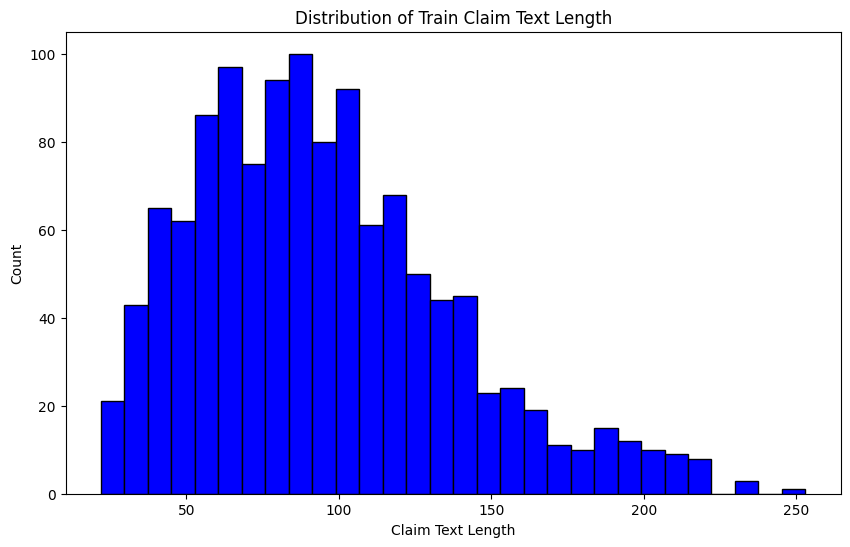

Average Train Claim Text Length: 99.07


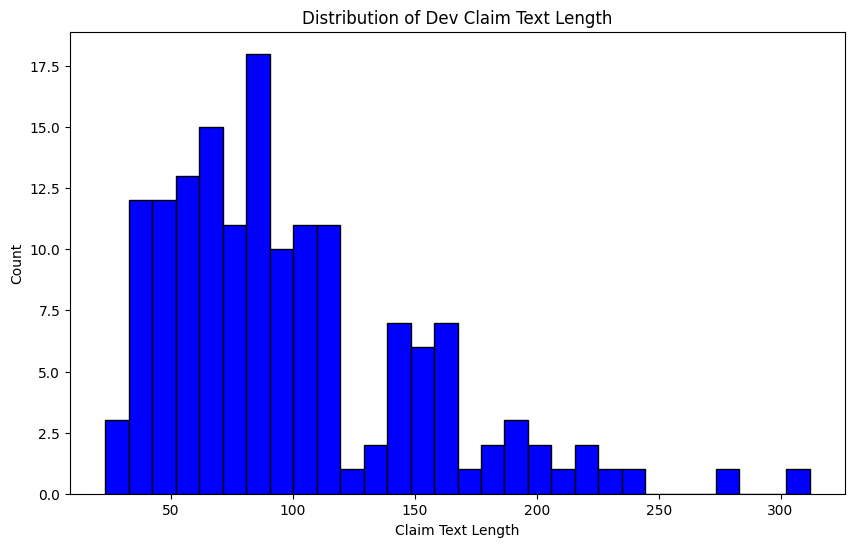

Average Train Claim Text Length: 94.20


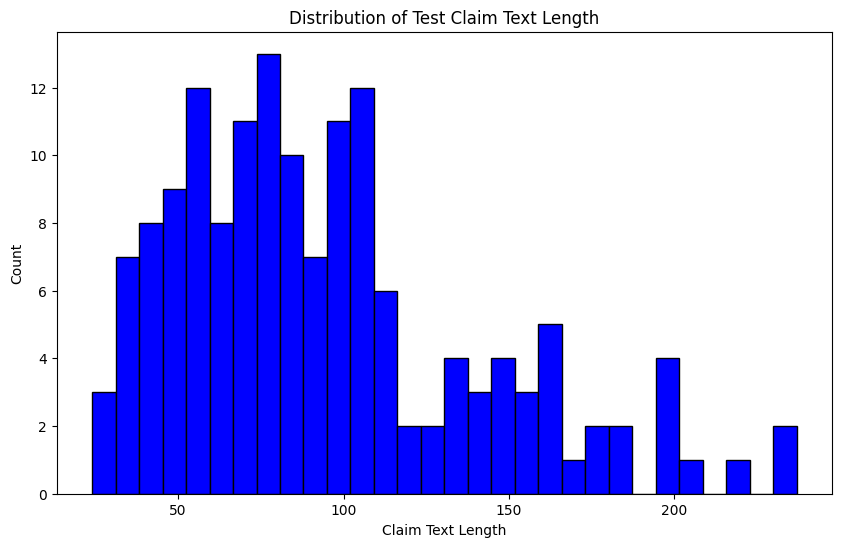

Average Train Claim Text Length: 95.12


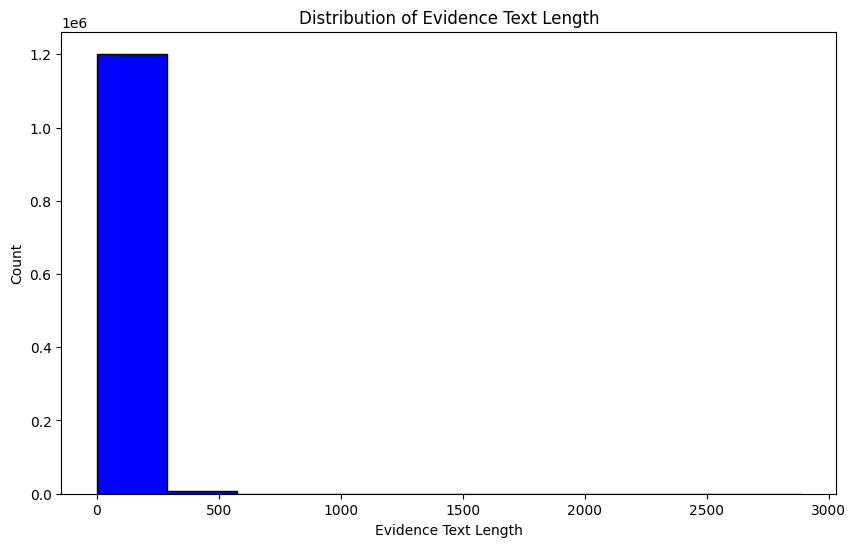

In [19]:
# Calculate the length of each claim
train['claim_text_non_stopword_length'] = train['claim_text_processed'].apply(len)

average_train_length = train['claim_text_non_stopword_length'].mean()
print(f'Average Train Claim Text Length: {average_train_length:.2f}')

# Plot the distribution of Train claim lengths using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(train['claim_text_non_stopword_length'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Train Claim Text Length')
plt.xlabel('Claim Text Length')
plt.ylabel('Count')
plt.show()

dev['claim_text_non_stopword_length'] = dev['claim_text_processed'].apply(len)

average_dev_length = dev['claim_text_non_stopword_length'].mean()
print(f'Average Train Claim Text Length: {average_dev_length:.2f}')

# Plot the distribution of Dev claim lengths using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(dev['claim_text_non_stopword_length'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Dev Claim Text Length')
plt.xlabel('Claim Text Length')
plt.ylabel('Count')
plt.show()

test['claim_text_non_stopword_length'] = test['claim_text_processed'].apply(len)

average_test_length = test['claim_text_non_stopword_length'].mean()
print(f'Average Train Claim Text Length: {average_test_length:.2f}')

# Plot the distribution of Test claim lengths using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(test['claim_text_non_stopword_length'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Test Claim Text Length')
plt.xlabel('Claim Text Length')
plt.ylabel('Count')
plt.show()

evidence['evidence_length_non_stopword_length'] = evidence['evidence_text_processed'].apply(len)

average_evidence_length = evidence['evidence_length_non_stopword_length'].mean()
print(f'Average Train Claim Text Length: {average_evidence_length:.2f}')

# Plot the distribution of Evidence Text Length using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(evidence['evidence_length_non_stopword_length'], bins=10, color='blue', edgecolor='black')
plt.title('Distribution of Evidence Text Length')
plt.xlabel('Evidence Text Length')
plt.ylabel('Count')
plt.show()

# How many unique unigram, bigram, trigram in our text

Token count before stop word remove

In [23]:
all_texts = pd.concat([train['claim_text'], dev['claim_text'], test['claim_text'], evidence['evidence_text']])

In [25]:
from nltk import ngrams
from nltk.tokenize import word_tokenize

# Make sure you've downloaded the necessary NLTK resources
nltk.download('punkt')

# Function to calculate n-grams
def get_ngrams(text_series, n):
    ngrams_set = set()
    for text in text_series:
        # Tokenize the text
        tokens = word_tokenize(text)
        # Generate n-grams from tokens
        n_grams = ngrams(tokens, n)
        # Update the set with new n-grams
        ngrams_set.update(n_grams)
    return ngrams_set

# Calculate unique unigrams, bigrams, trigrams
unique_unigrams = get_ngrams(all_texts, 1)
unique_bigrams = get_ngrams(all_texts, 2)
unique_trigrams = get_ngrams(all_texts, 3)

# Print the results
print(f'Number of unique unigrams: {len(unique_unigrams)}')
print(f'Number of unique bigrams: {len(unique_bigrams)}')
print(f'Number of unique trigrams: {len(unique_trigrams)}')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\15950\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


Number of unique unigrams: 795791
Number of unique bigrams: 5697619
Number of unique trigrams: 13300264


Token count after stop word remove

In [26]:
all_processed_texts = pd.concat([train['claim_text_processed'], dev['claim_text_processed'], 
                                 test['claim_text_processed'], evidence['evidence_text_processed']])

In [28]:
# Calculate unique unigrams, bigrams, trigrams
unique_processed_unigrams = get_ngrams(all_processed_texts, 1)
unique_processed_bigrams = get_ngrams(all_processed_texts, 2)
unique_processed_trigrams = get_ngrams(all_processed_texts, 3)

# Print the results
print(f'Number of unique unigrams: {len(unique_processed_unigrams)}')
print(f'Number of unique bigrams: {len(unique_processed_bigrams)}')
print(f'Number of unique trigrams: {len(unique_processed_trigrams)}')

Number of unique unigrams: 795784
Number of unique bigrams: 7203172
Number of unique trigrams: 12704837


large number of token size, therefore initial ranking is necessay for improved model performance and memory used

Step 2-4 will use the csv that output from the following code

In [46]:
dev.to_csv("dev.csv")

In [47]:
train.to_csv("train.csv")

In [48]:
evidence.to_csv("evidence.csv")

In [49]:
test.to_csv("test.csv")

following session please check step 2-4 notebook

# 2. Model Implementation
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

# 3.Testing and Evaluation
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)